In [225]:
import numpy as np

import itertools

from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

%matplotlib inline

In [49]:
# dataset original source: http://yann.lecun.com/exdb/mnist/, this comes from http://mldata.org/
digits = fetch_mldata('MNIST original')


In [50]:
# let's see what we have
for x in digits:
    print(x)


target
COL_NAMES
DESCR
data


In [51]:
print("dataset size: {}".format(digits.data.shape))


dataset size: (70000, 784)


In [320]:
digits.data[0]


array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [321]:
digits.data[6].reshape((28,28))

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.    

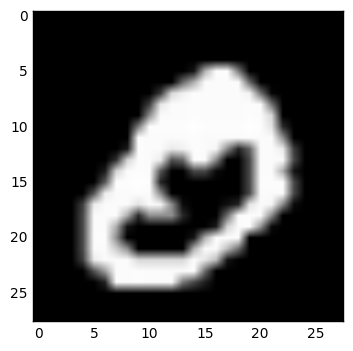

In [322]:
plt.imshow(digits.data[6].reshape((28,28)), cmap='gray')

In [323]:
# display 10 random digits
def show_me_what_you_got():
    for d in range(0, 10):
        plt.subplot(2,5, d+1)
        i = np.random.randint(digits.data.shape[0])
        digit = digits.data[i]
        digit = digit.reshape((28,28))
        plt.axis("off")
        plt.title(int(digits.target[i]))
        plt.imshow(digit, cmap='gray')

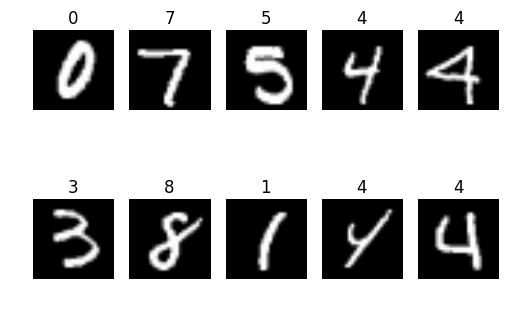

In [324]:
show_me_what_you_got()

In [325]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                    train_size=0.75, test_size=0.25,
                                                    random_state=90210)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(52500, 784) (17500, 784) (52500,) (17500,)


In [328]:
np.mean(X_train)

0.13031715580205297

In [329]:
from sklearn.ensemble import RandomForestClassifier

In [330]:
rf = RandomForestClassifier()

In [331]:
rf = rf.fit(X_train, y_train)

In [332]:
predictions = rf.predict(X_test)

In [333]:
sum(predictions == y_test)/len(y_test)

0.94571428571428573

In [334]:
def fit_and_predict(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    p = model.predict(X_test)
    print(sum(p == y_test)/len(y_test))
    return model

In [335]:
rf_new = RandomForestClassifier(n_estimators=50, # 10
                                criterion='gini', # entropy
                                max_depth=None, # none
                                min_samples_split=2, # 2
                                min_samples_leaf=1, # 1
                                min_weight_fraction_leaf=0.0,
                                max_features='auto', 
                                max_leaf_nodes=None, 
                                min_impurity_split=1e-07)




In [336]:
rf_new = fit_and_predict(rf_new, X_train, y_train, X_test, y_test)

0.966685714286


In [337]:
predictions = rf_new.predict(X_test)

In [338]:
features_new = rf_new.feature_importances_.reshape((28,28))
features = features/np.max(features)

In [339]:
features_old = rf.feature_importances_.reshape((28,28))
features_old = features_old/np.max(features_old)

In [340]:
diff = (features - features_old)**2
diff = diff/np.max(diff)

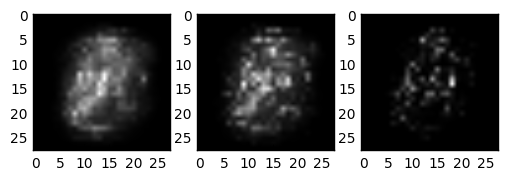

In [341]:
plt.subplot(1, 3, 1)
plt.imshow(features, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(features_old, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(diff, cmap='gray')
plt.show()

In [342]:
rf_new.score(X_test, y_test)

0.96668571428571426

In [343]:
from sklearn.metrics import classification_report
labels=[1,2,3,4,5,6,7,8,9,0]

In [344]:
print(classification_report(y_test, predictions, labels))

             precision    recall  f1-score   support

          1       0.99      0.99      0.99      1992
          2       0.96      0.97      0.96      1790
          3       0.95      0.95      0.95      1823
          4       0.96      0.97      0.97      1726
          5       0.96      0.96      0.96      1603
          6       0.98      0.98      0.98      1730
          7       0.97      0.96      0.97      1771
          8       0.96      0.95      0.96      1617
          9       0.95      0.95      0.95      1710
          0       0.98      0.99      0.98      1738

avg / total       0.97      0.97      0.97     17500



In [345]:
from sklearn.metrics import confusion_matrix


In [346]:
cm = confusion_matrix(y_test, predictions, labels)
print(cm)

[[1964    4    5    4    2    3    3    3    3    1]
 [   2 1729    9    7    2    9   13   12    1    6]
 [   2   29 1734    3   23    0   16    7    7    2]
 [   3    2    3 1670    2    8    4    4   28    2]
 [   0    2   30    2 1533   11    1   10    4   10]
 [   5    1    0    3   13 1700    0    2    0    6]
 [   3   20    2    8    1    0 1706    1   28    2]
 [   4    5   15   11   15    6    2 1544   12    3]
 [   2    4   23   20    6    0   11   15 1625    4]
 [   0    2    0    3    4    5    0   11    1 1712]]


In [347]:
cm[np.diag_indices(10)] = 0

In [348]:
cm

array([[ 0,  4,  5,  4,  2,  3,  3,  3,  3,  1],
       [ 2,  0,  9,  7,  2,  9, 13, 12,  1,  6],
       [ 2, 29,  0,  3, 23,  0, 16,  7,  7,  2],
       [ 3,  2,  3,  0,  2,  8,  4,  4, 28,  2],
       [ 0,  2, 30,  2,  0, 11,  1, 10,  4, 10],
       [ 5,  1,  0,  3, 13,  0,  0,  2,  0,  6],
       [ 3, 20,  2,  8,  1,  0,  0,  1, 28,  2],
       [ 4,  5, 15, 11, 15,  6,  2,  0, 12,  3],
       [ 2,  4, 23, 20,  6,  0, 11, 15,  0,  4],
       [ 0,  2,  0,  3,  4,  5,  0, 11,  1,  0]])

In [349]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 0  4  5  4  2  3  3  3  3  1]
 [ 2  0  9  7  2  9 13 12  1  6]
 [ 2 29  0  3 23  0 16  7  7  2]
 [ 3  2  3  0  2  8  4  4 28  2]
 [ 0  2 30  2  0 11  1 10  4 10]
 [ 5  1  0  3 13  0  0  2  0  6]
 [ 3 20  2  8  1  0  0  1 28  2]
 [ 4  5 15 11 15  6  2  0 12  3]
 [ 2  4 23 20  6  0 11 15  0  4]
 [ 0  2  0  3  4  5  0 11  1  0]]


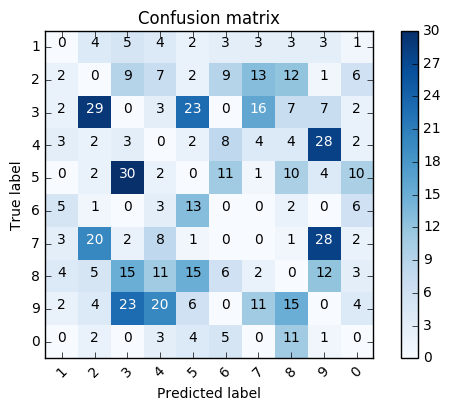

In [350]:
plot_confusion_matrix(cm, labels)

In [351]:
X_train_norm = np.around(X_train/np.max(X_train))
X_test_norm = np.around(X_test/np.max(X_test))

In [352]:
fit_and_predict(rf_new, X_train_norm, y_train, X_test_norm, y_test)

0.9616


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [353]:
X_train_norm = np.ceil(X_train)
X_test_norm = np.ceil(X_test)

In [354]:
X_test_norm[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0

In [355]:
fit_and_predict(rf_new, X_train_norm, y_train, X_test_norm, y_test)

0.966571428571


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [356]:
from sklearn.decomposition import PCA

In [409]:
pca = PCA(n_components=360, svd_solver='randomized')
pca.fit(X_train_norm)

PCA(copy=True, iterated_power='auto', n_components=360, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)

In [410]:
X_train_PCA = pca.transform(X_train_norm)
X_test_PCA = pca.transform(X_test_norm)

In [ ]:
rf_pca = fit_and_predict(RandomForestClassifier(n_estimators=50), X_train_PCA, y_train, X_test_PCA, y_test)

In [ ]:
a